s517669958

In [3]:
import sys

import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage import data
from scipy import ndimage
import matplotlib.pyplot as plt



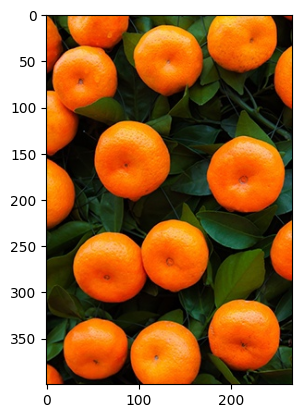

In [4]:
input_image = cv.imread('img.jpg')
image = input_image
image_rgb = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)

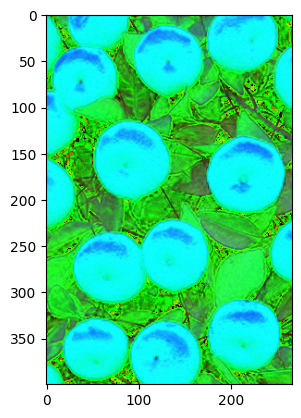

In [5]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)
plt.imshow(image_hsv)

/home/ilia/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[168]
 [107]]
[[168 168 168 ... 168 168 168]
 [107 168 168 ... 168 168 168]
 [168 168 168 ... 168 168 168]
 ...
 [168 168 168 ... 168 168 168]
 [168 168 168 ... 168 168 168]
 [168 168 168 ... 168 107 107]]


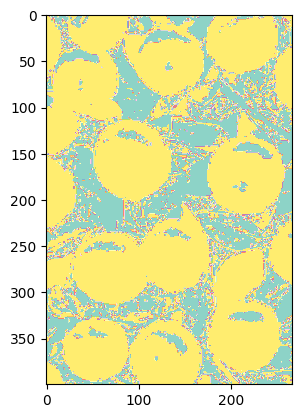

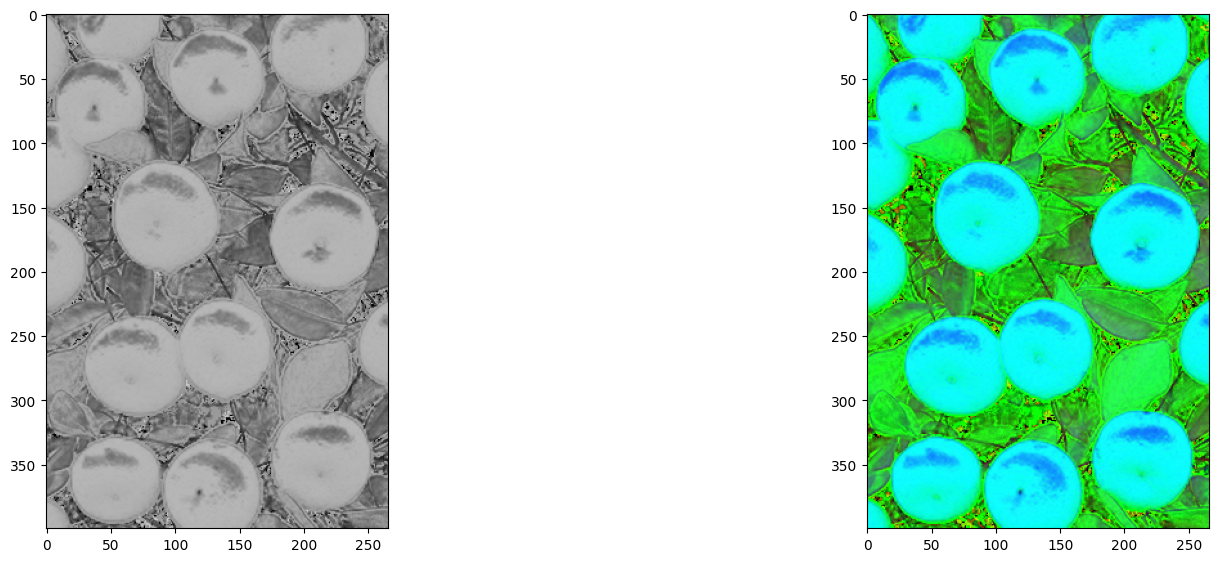

In [6]:
import sys

import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage import data
from scipy import ndimage
import matplotlib.pyplot as plt


gray =cv.cvtColor(image_hsv, cv.COLOR_RGB2GRAY)
## Методы кластеризации. K-средних
# Преобразуем изображение в оттенках серого в одномерный массив
pixels = gray.reshape(-1, 1)
# Задаем число кластеров для сегментации
K = 2
# С помощью библиотеки sklearn.cluster import KMeans проводим кластеризацию по яркости
kmeans = KMeans(n_clusters=K, random_state=0)
labels = kmeans.fit_predict(pixels)
cluster_centers = kmeans.cluster_centers_
print (np.uint8(cluster_centers))
# Каждому пикселю назначаем значение из центра кластера
segments = np.uint8(cluster_centers[labels].reshape(gray.shape))
print(segments) 
plt.imshow(segments, cmap='Set3')

segments[segments==109 ] = 0

result = cv.bitwise_and(image_hsv, image_hsv, mask=segments)
# Отобразим избражения 
plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(gray, cv.COLOR_GRAY2RGB))
plt.subplot(1, 3, 3)
plt.imshow(result)
plt.show()

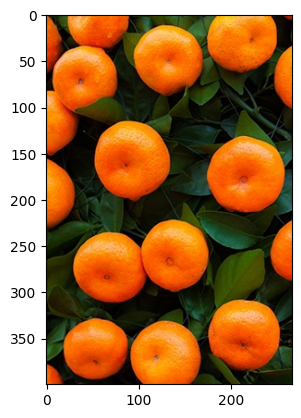

In [7]:
rgb_result =cv.cvtColor(result, cv.COLOR_HSV2RGB)
plt.imshow(rgb_result)

/home/ilia/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[ 79]
 [147]
 [ 21]]
[[ 21  21  21 ...  79  79  79]
 [147  21  21 ...  79  79  79]
 [147 147  79 ...  79  79  79]
 ...
 [147 147 147 ...  21  21  21]
 [147 147 147 ...  21  21  21]
 [147 147 147 ...  21  21  21]]


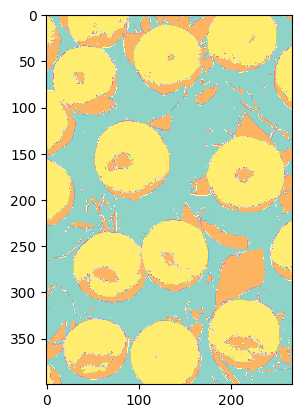

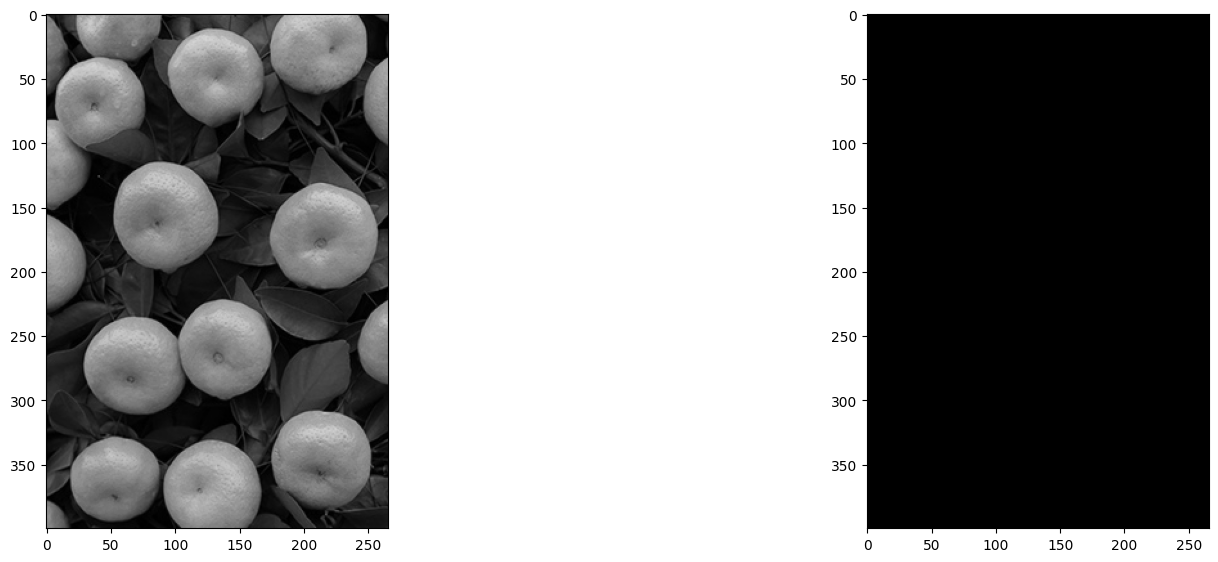

In [8]:

gray =cv.cvtColor(rgb_result, cv.COLOR_RGB2GRAY)
## Методы кластеризации. K-средних
# Преобразуем изображение в оттенках серого в одномерный массив
pixels = gray.reshape(-1, 1)
# Задаем число кластеров для сегментации
K = 3
# С помощью библиотеки sklearn.cluster import KMeans проводим кластеризацию по яркости
kmeans = KMeans(n_clusters=K, random_state=0)
labels = kmeans.fit_predict(pixels)
cluster_centers = kmeans.cluster_centers_
print (np.uint8(cluster_centers))
# Каждому пикселю назначаем значение из центра кластера
segments = np.uint8(cluster_centers[labels].reshape(gray.shape))
print(segments) 
plt.imshow(segments, cmap='Set3')

segments[segments!=182 ] = 0

resultt = cv.bitwise_and(image_hsv, image_hsv, mask=segments)
# Отобразим избражения 
plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(gray, cv.COLOR_GRAY2RGB))
plt.subplot(1, 3, 3)
plt.imshow(resultt)
plt.show()

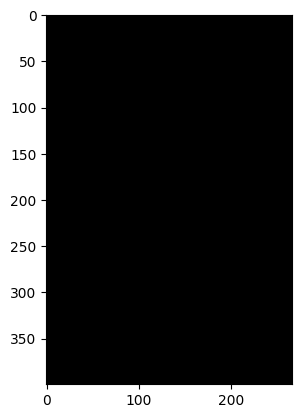

In [9]:
rgb_result =cv.cvtColor(resultt, cv.COLOR_HSV2RGB)
plt.imshow(rgb_result)